In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [30]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.30971087,  0.65054141],
       [-1.32435711, -0.36051227],
       [-1.40967409, -0.29522986],
       [-1.33958163, -0.64830449],
       [-1.33146886,  0.66552653],
       [-1.11293846,  1.50992585],
       [-1.37627274, -0.18221302],
       [-1.28141939,  0.33277896],
       [-1.4084016 , -1.17789289],
       [-1.30416299, -0.23173293],
       [-1.22325714,  1.3138624 ],
       [-1.2748859 ,  0.03000162],
       [-1.35947347, -0.47887104],
       [-1.57304515, -1.04159745],
       [-1.29049784,  2.40088235],
       [-1.16426043,  2.72533645],
       [-1.28014238,  1.65117453],
       [-1.29222826,  0.6351676 ],
       [-1.07339558,  1.7777797 ],
       [-1.26280003,  1.04600854],
       [-1.12728243,  0.79708495],
       [-1.24119316,  0.88191703],
       [-1.56920777,  0.27184488],
       [-1.12361159,  0.20104806],
       [-1.14948296, -0.07593489],
       [-1.2231214 , -0.29740403],
       [-1.20465318,  0.26671917],
       [-1.25027614,  0.74896183],
       [-1.28795287,

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier



In [34]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform', p=2)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy for k={k}: {accuracy:.2f}')
    cm=confusion_matrix(y_test, y_pred_test)
    print(f'Confusion Matrix for k={k}:\n{cm}')
    print('-'*50)

Accuracy for k=1: 0.93
Confusion Matrix for k=1:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
--------------------------------------------------
Accuracy for k=2: 0.93
Confusion Matrix for k=2:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
--------------------------------------------------
Accuracy for k=3: 0.93
Confusion Matrix for k=3:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
--------------------------------------------------
Accuracy for k=4: 0.97
Confusion Matrix for k=4:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
--------------------------------------------------
Accuracy for k=5: 0.93
Confusion Matrix for k=5:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
--------------------------------------------------
Accuracy for k=6: 0.97
Confusion Matrix for k=6:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
--------------------------------------------------
Accuracy for k=7: 0.93
Confusion Matrix for k=7:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
--------------------------------------------------
Accuracy for k=8: 1.00
Confusion Matrix f

In [35]:
# accuracy best for k=4
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean', weights='uniform', p=2)
knn.fit(X_train, y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [36]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


In [37]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


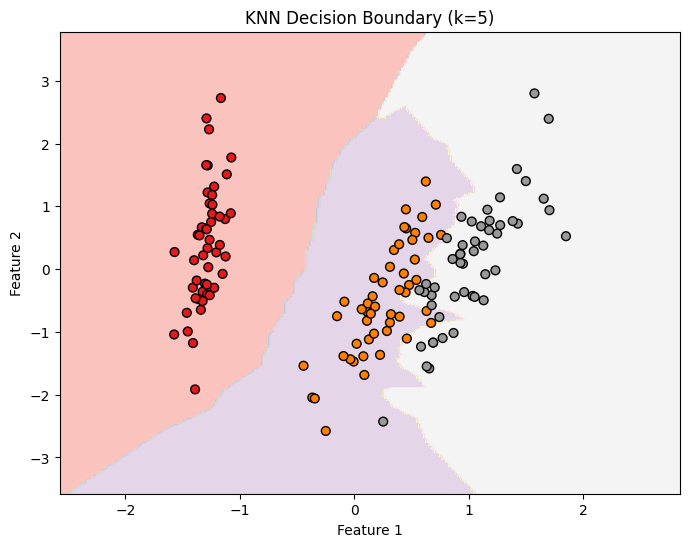

In [38]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary (k=5)')
plt.show()